# import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set(style="whitegrid")


# Import data

In [5]:
df = pd.read_csv('Mall_Customers.csv')

# Feature selection

In [6]:
X = df.iloc[:, [3, 4]].values

# Feature scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simple visiualization

In [8]:
print(f"Data Shape after scaling: {X_scaled.shape}")
df.head()

Data Shape after scaling: (200, 2)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# K-means

In [9]:
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=42
)

y_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, y_kmeans)

print(f"K-Means Silhouette Score: {score_kmeans:.4f}")


K-Means Silhouette Score: 0.5547


# BIRCH

In [10]:
best_birch_score = -1
best_threshold = None
best_y_birch = None

for thr in np.arange(0.3, 0.8, 0.05):
    br = Birch(
        n_clusters=5,
        threshold=thr,
        branching_factor=50
    )
    
    labels = br.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    
    if score > best_birch_score:
        best_birch_score = score
        best_threshold = thr
        best_y_birch = labels

print(f"Best Threshold: {best_threshold}")
print(f"BIRCH Silhouette Score: {best_birch_score:.4f}")


Best Threshold: 0.35
BIRCH Silhouette Score: 0.5548


# Visualization and comparison

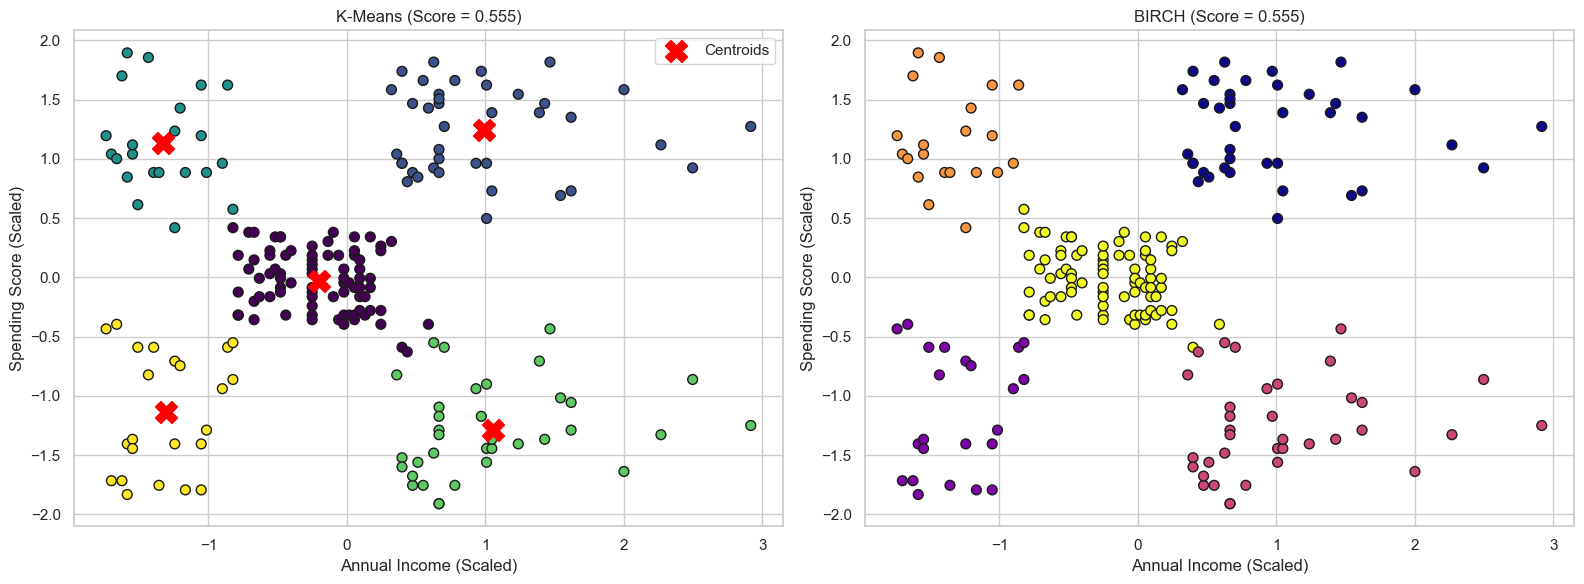

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
ax1.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=y_kmeans, cmap='viridis', s=50, edgecolors='k'
)
ax1.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red', s=250, marker='X', label='Centroids'
)
ax1.set_title(f'K-Means (Score = {score_kmeans:.3f})')
ax1.set_xlabel('Annual Income (Scaled)')
ax1.set_ylabel('Spending Score (Scaled)')
ax1.legend()

# BIRCH
ax2.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=best_y_birch, cmap='plasma', s=50, edgecolors='k'
)
ax2.set_title(f'BIRCH (Score = {best_birch_score:.3f})')
ax2.set_xlabel('Annual Income (Scaled)')
ax2.set_ylabel('Spending Score (Scaled)')

plt.tight_layout()
plt.show()


# New values

In [ ]:
best_birch_model = Birch(
    n_clusters=5,
    threshold=best_threshold, 
    branching_factor=50
)
best_birch_model.fit(X_scaled) 

final_kmeans = kmeans 

print("🔮 4. Predicting New Values (Testing Models)...")

new_customers = np.array([
    [100, 10],  
    [20, 90]    
])

new_customers_scaled = scaler.transform(new_customers)

pred_kmeans = final_kmeans.predict(new_customers_scaled)
pred_birch = best_birch_model.predict(new_customers_scaled)

print(f"   New Data (Income, Score): {new_customers.tolist()}")
print(f"   ➡️ K-Means Predictions: Clusters {pred_kmeans}")
print(f"   ➡️ BIRCH Predictions:   Clusters {pred_birch}")
print("-" * 30)

🔮 4. Predicting New Values (Testing Models)...
   New Data (Income, Score): [[100, 10], [20, 90]]
   ➡️ K-Means Predictions: Clusters [3 2]
   ➡️ BIRCH Predictions:   Clusters [2 3]
------------------------------


# visualize

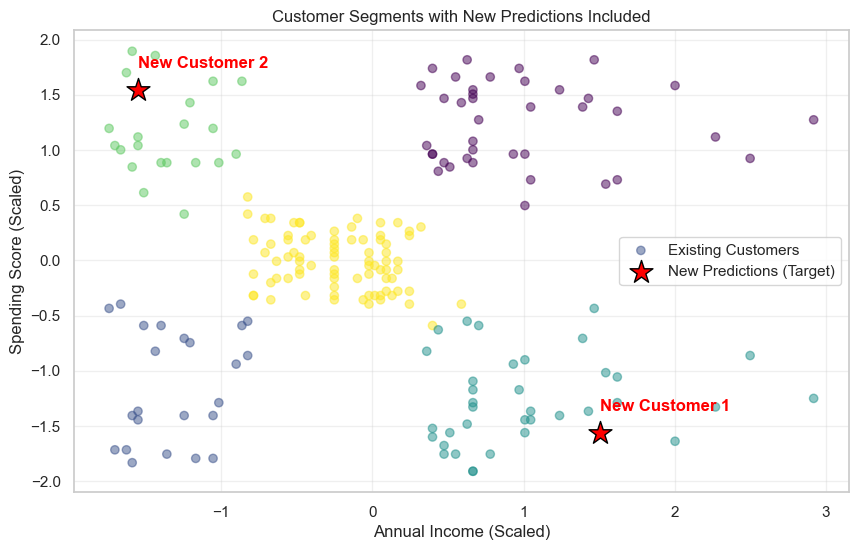

In [14]:
# --- 5. Visualization of New Predictions ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 1. رسم العملاء الحاليين (Existing Data)
# نستخدم best_y_birch أو y_kmeans حسب النموذج المعتمد
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_y_birch, cmap='viridis', alpha=0.5, label='Existing Customers')

# 2. رسم العملاء الجدد (New Predictions)
# نميزهم بلون أحمر ونجمة كبيرة ليكونوا واضحين
plt.scatter(new_customers_scaled[:, 0], new_customers_scaled[:, 1], 
            c='red', marker='*', s=300, edgecolors='black', label='New Predictions (Target)')

# إضافة تسمية توضيحية فوق كل نقطة جديدة
for i, point in enumerate(new_customers_scaled):
    plt.text(point[0], point[1]+0.2, f"New Customer {i+1}", fontsize=12, fontweight='bold', color='red')

plt.title('Customer Segments with New Predictions Included')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Comparison


Final Silhouette Scores:

K-Means: 0.5547  
BIRCH: 0.5548 (Slightly Higher)

The difference between the two scores is extremely small and negligible.


| Feature | K-Means Algorithm | BIRCH Algorithm |
|---------|-------------------|-----------------|
| Core Concept | Distance-based (Centroids) | Hierarchical Clustering using CF Tree |
| Cluster Shape | Assumes spherical clusters | Can handle varied cluster shapes |
| Assignment | Hard clustering (each point belongs to one cluster) | Hard clustering |
| Parameters | Number of clusters (K) | Threshold, branching factor |
| Sensitivity | Sensitive to initialization | Highly sensitive to threshold |
| Scalability | Best for small to medium datasets | Designed for very large datasets |
| Interpretability | Easy to understand and visualize | More complex |